In [ ]:
import tensorflow as tf
print(tf.__version__)

2.4.1


In [ ]:
series = pd.read_excel('Kamchatka1.xlsx')
series.head(10)

,Date,Час,Мин,Сек,Ошибка по времени,Широта,Ошибка по широте,Долгота,Ошибка по долготе,Глубина,Ошибка по глубине,Magnitude,Код сети,Сейсмический регион,Географический регион,Макросейсмические данные
0,2003-01-01,1,33,22.1,1.2,52.80,0.01,160.18,0.01,34,3.0,4.8,KAGSR,Камчатка и Командорские острова,NaN,Ощущалось на мысе\r\nШипунский силой 2 балла.
1,2003-01-01,3,41,7.8,0.4,53.70,0.03,160.81,0.03,36,5.0,3.0,KAGSR,Камчатка и Командорские острова,NaN,NaN
2,2003-01-01,10,30,51.4,0.7,54.96,0.03,161.02,0.03,87,3.0,2.8,KAGSR,Камчатка и Командорские острова,NaN,NaN
3,2003-01-01,14,57,50.2,0.8,51.25,0.13,153.40,0.13,287,13.0,3.6,KAGSR,Камчатка и Командорские острова,NaN,NaN
4,2003-01-03,5,30,32.8,0.4,55.59,0.11,165.93,0.11,19,12.0,3.6,KAGSR,Камчатка и Командорские острова,NaN,NaN
5,2003-01-03,7,53,24.1,0.6,54.11,0.14,169.33,0.14,21,17.0,2.9,KAGSR,Камчатка и Командорские острова,NaN,NaN
6,2003-01-03,8,5,5.3,0.6,53.05,0.02,160.55,0.02,37,3.0,3.3,KAGSR,Камчатка и Командорские острова,NaN,NaN
7,2003-01-04,2,5,5.3,0.5,50.72,0.04,157.42,0.04,40,10.0,3.1,KAGSR,Камчатка и Командорские острова,NaN,NaN
8,2003-01-04,11,32,34.3,0.6,55.39,0.04,166.45,0.04,24,3.0,2.9,KAGSR,Камчатка и Командорские острова,NaN,NaN
9,2003-01-04,13,46,16.3,0.5,49.38,0.14,156.32,0.14,64,31.0,3.2,KAGSR,Камчатка и Командорские острова,NaN,NaN


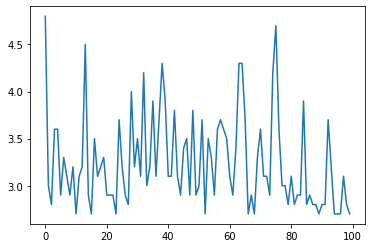

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
series = pd.read_excel('Kamchatka1.xlsx')

time = np.array(range(0,len(series['Date'])))
#time_1 = np.array(series['Date'])
Magnitude = np.array(series['Magnitude'])
#print(time)
plt.plot(time[:100],Magnitude[:100])
plt.show()

In [ ]:
plt.plot(Date,Magnitude)
plt.show()

NameError: ignored

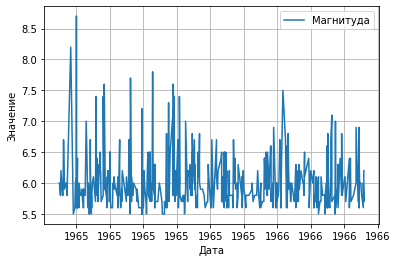

In [ ]:
import matplotlib.dates as mdates
##plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=65))
plt.plot(time[:500],Magnitude[:500],label="Магнитуда")
plt.legend(loc="upper right")
plt.grid()
plt.xlabel("Дата")
plt.ylabel("Значение")
plt.show()

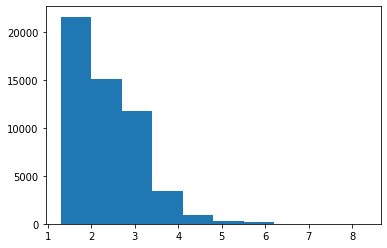

In [4]:
#xaxis = np.array(range(5,10))
#print(xaxis)
#plt.bar(xaxis,series['Magnitude'])
#series['Magnitude'].plot(kind="hist",title = "Магнитуда")
plt.hist(series['Magnitude'],label = "Гистограмма")
plt.show()

In [ ]:
print(series['Date'][0])
Date = pd.to_datetime(series['Date'],format = "%m/%d/%Y" )
print(Date)

01/02/1965
0       1965-01-02
1       1965-01-04
2       1965-01-05
3       1965-01-08
4       1965-01-09
           ...    
23407   2016-12-28
23408   2016-12-28
23409   2016-12-28
23410   2016-12-29
23411   2016-12-30
Name: Date, Length: 23412, dtype: datetime64[ns]


In [ ]:
series.head(30)

,Date,Time,Latitude,Longitude,Type,Depth,Depth Error,Depth Seismic Stations,Magnitude,Magnitude Type,Magnitude Error,Magnitude Seismic Stations,Azimuthal Gap,Horizontal Distance,Horizontal Error,Root Mean Square,ID,Source,Location Source,Magnitude Source,Status
0,01/02/1965,13:44:18,19.246,145.616,Earthquake,131.6,NaN,NaN,6.0,MW,NaN,NaN,NaN,NaN,NaN,NaN,ISCGEM860706,ISCGEM,ISCGEM,ISCGEM,Automatic
1,01/04/1965,11:29:49,1.863,127.352,Earthquake,80.0,NaN,NaN,5.8,MW,NaN,NaN,NaN,NaN,NaN,NaN,ISCGEM860737,ISCGEM,ISCGEM,ISCGEM,Automatic
2,01/05/1965,18:05:58,-20.579,-173.972,Earthquake,20.0,NaN,NaN,6.2,MW,NaN,NaN,NaN,NaN,NaN,NaN,ISCGEM860762,ISCGEM,ISCGEM,ISCGEM,Automatic
3,01/08/1965,18:49:43,-59.076,-23.557,Earthquake,15.0,NaN,NaN,5.8,MW,NaN,NaN,NaN,NaN,NaN,NaN,ISCGEM860856,ISCGEM,ISCGEM,ISCGEM,Automatic
4,01/09/1965,13:32:50,11.938,126.427,Earthquake,15.0,NaN,NaN,5.8,MW,NaN,NaN,NaN,NaN,NaN,NaN,ISCGEM860890,ISCGEM,ISCGEM,ISCGEM,Automatic
5,01/10/1965,13:36:32,-13.405,166.629,Earthquake,35.0,NaN,NaN,6.7,MW,NaN,NaN,NaN,NaN,NaN,NaN,ISCGEM860922,ISCGEM,ISCGEM,ISCGEM,Automatic
6,01/12/1965,13:32:25,27.357,87.867,Earthquake,20.0,NaN,NaN,5.9,MW,NaN,NaN,NaN,NaN,NaN,NaN,ISCGEM861007,ISCGEM,ISCGEM,ISCGEM,Automatic
7,01/15/1965,23:17:42,-13.309,166.212,Earthquake,35.0,NaN,NaN,6.0,MW,NaN,NaN,NaN,NaN,NaN,NaN,ISCGEM861111,ISCGEM,ISCGEM,ISCGEM,Automatic
8,01/16/1965,11:32:37,-56.452,-27.043,Earthquake,95.0,NaN,NaN,6.0,MW,NaN,NaN,NaN,NaN,NaN,NaN,ISCGEMSUP861125,ISCGEMSUP,ISCGEM,ISCGEM,Automatic
9,01/17/1965,10:43:17,-24.563,178.487,Earthquake,565.0,NaN,NaN,5.8,MW,NaN,NaN,NaN,NaN,NaN,NaN,ISCGEM861148,ISCGEM,ISCGEM,ISCGEM,Automatic


In [5]:
split_time = 52000
time_train = time[:split_time]
x_train = Magnitude[:split_time]
time_valid = time[split_time:]
x_valid = Magnitude[split_time:]

window_size = 30
batch_size = 32
shuffle_buffer_size = 3000

In [6]:
print(len(series['Date']))

53463


In [7]:
def windowed_dataset(Magnitude, window_size, batch_size, shuffle_buffer):
    Magnitude = tf.expand_dims(Magnitude, axis=-1)
    ds = tf.data.Dataset.from_tensor_slices(Magnitude)
    ds = ds.window(window_size + 1, shift=1, drop_remainder=True)
    ds = ds.flat_map(lambda w: w.batch(window_size + 1))
    ds = ds.shuffle(shuffle_buffer)
    ds = ds.map(lambda w: (w[:-1], w[1:]))
    return ds.batch(batch_size).prefetch(1)

In [8]:
def model_forecast(model, Magnitude, window_size):
    ds = tf.data.Dataset.from_tensor_slices(Magnitude)
    ds = ds.window(window_size, shift=1, drop_remainder=True)
    ds = ds.flat_map(lambda w: w.batch(window_size))
    ds = ds.batch(60).prefetch(1)
    forecast = model.predict(ds)
    return forecast

In [71]:
tf.keras.backend.clear_session()
tf.random.set_seed(51)
np.random.seed(51)
train_set = windowed_dataset(x_train, window_size=60, batch_size=120, shuffle_buffer=shuffle_buffer_size)
model = tf.keras.models.Sequential([
  
  tf.keras.layers.Conv1D(filters=60, kernel_size=60,
                      strides=1, padding="causal",
                      activation="relu",
                      input_shape=[None, 1]),   
  #tf.keras.layers.LSTM(60, return_sequences=True),  
  tf.keras.layers.LSTM(60, return_sequences=True), 
  tf.keras.layers.Dense(45, activation="relu"),
  tf.keras.layers.Dense(25, activation="relu"),  
  tf.keras.layers.Dense(1),
  tf.keras.layers.Lambda(lambda x: x * 400)
])


optimizer = tf.keras.optimizers.SGD(lr=1e-7, momentum=0.9)
model.compile(loss=tf.keras.losses.Huber(),
              optimizer=optimizer,
              metrics=["mae"])
history = model.fit(train_set,epochs=50)

Epoch 1/50
433/433 [==============================] - 10s 19ms/step - loss: 10.1736 - mae: 10.6508
Epoch 2/50
433/433 [==============================] - 9s 19ms/step - loss: 2.4394 - mae: 2.8985
Epoch 3/50
433/433 [==============================] - 9s 19ms/step - loss: 1.9799 - mae: 2.4300
Epoch 4/50
433/433 [==============================] - 9s 19ms/step - loss: 1.6741 - mae: 2.1175
Epoch 5/50
433/433 [==============================] - 9s 19ms/step - loss: 1.4423 - mae: 1.8796
Epoch 6/50
433/433 [==============================] - 9s 19ms/step - loss: 1.2640 - mae: 1.6952
Epoch 7/50
433/433 [==============================] - 9s 19ms/step - loss: 1.1400 - mae: 1.5655
Epoch 8/50
433/433 [==============================] - 9s 19ms/step - loss: 1.0527 - mae: 1.4736
Epoch 9/50
433/433 [==============================] - 9s 19ms/step - loss: 0.9877 - mae: 1.4051
Epoch 10/50
433/433 [==============================] - 9s 19ms/step - loss: 0.9332 - mae: 1.3476
Epoch 11/50
433/433 [===============

In [72]:
def plot_series(Date, Magnitude , start=0, end=None):
    plt.plot(Date[start:end], Magnitude[start:end], )
    plt.xlabel("Time")
    plt.ylabel("Value")
    plt.grid(True)

In [73]:
rnn_forecast = model_forecast(model, Magnitude[...,np.newaxis], window_size)
rnn_forecast = rnn_forecast[split_time - window_size:-1, -1, -0]

In [75]:
print(x_train)

[4.8 3.  2.8 ... 2.4 2.3 2.6]


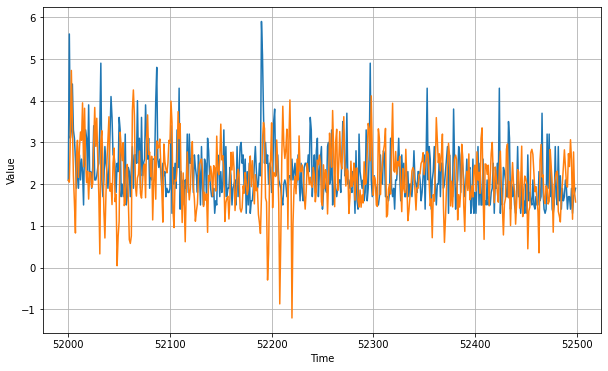

In [74]:
plt.figure(figsize=(10, 6))
plot_series(time_valid[:500], x_valid[:500])
plot_series(time_valid[:500], rnn_forecast[:500])

In [76]:
print(rnn_forecast)

print(x_valid)

[2.0896056 2.0468957 3.1147776 ... 2.5845737 2.9939892 2.6365788]
[2.1 5.6 3.1 ... 1.4 2.1 2.9]


In [50]:
tf.keras.metrics.mean_absolute_error(x_valid, rnn_forecast).numpy()

0.71229297

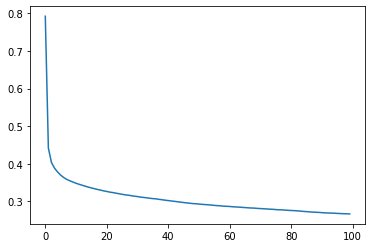

In [ ]:
plt.plot(history.epoch, history.history["loss"])
plt.show()

In [ ]:
print(history.history)

{'loss': [0.4575381278991699, 0.37338608503341675, 0.3245077133178711, 0.2910018563270569, 0.275409996509552, 0.26600542664527893, 0.2587117552757263, 0.2522142231464386, 0.24648907780647278, 0.24079082906246185, 0.23565663397312164, 0.2304273545742035, 0.22539503872394562, 0.22099484503269196, 0.2166183888912201, 0.21223248541355133, 0.20796312391757965, 0.20434492826461792, 0.20021606981754303, 0.1965913325548172, 0.19305770099163055, 0.18979229032993317, 0.1864350587129593, 0.18328402936458588, 0.17994993925094604, 0.17687617242336273, 0.1736821085214615, 0.17074023187160492, 0.1678476631641388, 0.16496039927005768, 0.1626530885696411, 0.16053278744220734, 0.15849421918392181, 0.15656185150146484, 0.15494070947170258, 0.1530768871307373, 0.15150956809520721, 0.14989085495471954, 0.14819447696208954, 0.14682945609092712, 0.14543679356575012, 0.14413386583328247, 0.14284366369247437, 0.14164602756500244, 0.1404423713684082, 0.1394408494234085, 0.13822399079799652, 0.13720813393592834,

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d (Conv1D)              (None, None, 60)          360       
_________________________________________________________________
lstm (LSTM)                  (None, None, 60)          29040     
_________________________________________________________________
lstm_1 (LSTM)                (None, None, 60)          29040     
_________________________________________________________________
dense (Dense)                (None, None, 50)          3050      
_________________________________________________________________
dense_1 (Dense)              (None, None, 25)          1275      
_________________________________________________________________
dense_2 (Dense)              (None, None, 1)           26        
_________________________________________________________________
lambda (Lambda)              (None, None, 1)           0

<Figure size 432x288 with 0 Axes>

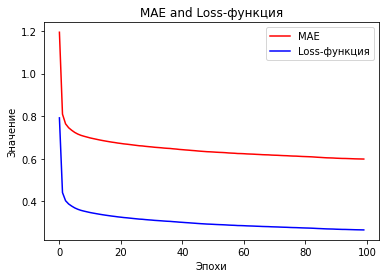

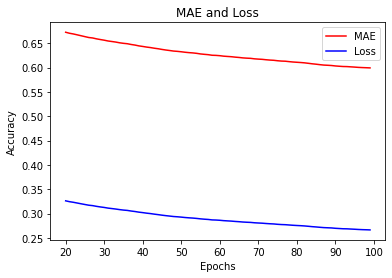

<Figure size 432x288 with 0 Axes>

In [ ]:
import matplotlib.image  as mpimg
import matplotlib.pyplot as plt

#-----------------------------------------------------------
# Retrieve a list of list results on training and test data
# sets for each training epoch
#-----------------------------------------------------------
mae=history.history['mae']
loss=history.history['loss']

epochs=range(len(loss)) # Get number of epochs

#------------------------------------------------
# Plot MAE and Loss
#------------------------------------------------
plt.plot(epochs, mae, 'r')
plt.plot(epochs, loss, 'b')
plt.title('MAE and Loss-функция')
plt.xlabel("Эпохи")
plt.ylabel("Значение")
plt.legend(["MAE", "Loss-функция"])

plt.figure()

epochs_zoom = epochs[20:]
mae_zoom = mae[20:]
loss_zoom = loss[20:]

#------------------------------------------------
# Plot Zoomed MAE and Loss
#------------------------------------------------
plt.plot(epochs_zoom, mae_zoom, 'r')
plt.plot(epochs_zoom, loss_zoom, 'b')
plt.title('MAE and Loss')
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend(["MAE", "Loss"])

plt.figure()

In [ ]:
Magnitude=np.reshape(Magnitude,(23412,1,1))
model.predict(Magnitude[23385:23415][np.newaxis])